In [18]:
import torch
import torchvision
from torchvision import transforms, datasets

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [19]:
train = torchvision.datasets.MNIST('', train=True, download=True,
                       transform=transforms.Compose([
                           transforms.ToTensor()
                       ]))

test = torchvision.datasets.MNIST('', train=False, download=True,
                       transform=transforms.Compose([
                           transforms.ToTensor()
                       ]))

trainset = torch.utils.data.DataLoader(train, batch_size=10, shuffle=True, num_workers=2)

testset = torch.utils.data.DataLoader(test, batch_size=10, shuffle=False, num_workers=2)

In [20]:
len(train)

60000

In [21]:
len(trainset)

6000

In [22]:
len(test)

10000

In [23]:
len(testset)

1000

In [33]:
type(testset)

torch.utils.data.dataloader.DataLoader

In [34]:
type(test)

torchvision.datasets.mnist.MNIST

In [37]:
help(testset)

Help on DataLoader in module torch.utils.data.dataloader object:

class DataLoader(builtins.object)
 |  DataLoader(dataset, batch_size=1, shuffle=False, sampler=None, batch_sampler=None, num_workers=0, collate_fn=None, pin_memory=False, drop_last=False, timeout=0, worker_init_fn=None, multiprocessing_context=None)
 |  
 |  Data loader. Combines a dataset and a sampler, and provides an iterable over
 |  the given dataset.
 |  
 |  The :class:`~torch.utils.data.DataLoader` supports both map-style and
 |  iterable-style datasets with single- or multi-process loading, customizing
 |  loading order and optional automatic batching (collation) and memory pinning.
 |  
 |  See :py:mod:`torch.utils.data` documentation page for more details.
 |  
 |  Arguments:
 |      dataset (Dataset): dataset from which to load the data.
 |      batch_size (int, optional): how many samples per batch to load
 |          (default: ``1``).
 |      shuffle (bool, optional): set to ``True`` to have the data reshuf

In [24]:
trainset_shape = trainset.dataset.train_data.shape
testset_shape = testset.dataset.test_data.shape

print(trainset_shape, testset_shape)

torch.Size([60000, 28, 28]) torch.Size([10000, 28, 28])


/home/scarlet/Projects/PyEnvs/DSPyTorchEnv/DSPyTEnv/lib/python3.7/site-packages/torchvision/datasets/mnist.py:55: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/home/scarlet/Projects/PyEnvs/DSPyTorchEnv/DSPyTEnv/lib/python3.7/site-packages/torchvision/datasets/mnist.py:60: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")


In [25]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28*28, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 10)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return F.log_softmax(x, dim=1)      

In [26]:
net = Net()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [27]:
loss_criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.005)

In [28]:
for epoch in range(5): 
    for data in trainset:  
        X, y = data  
        net.zero_grad()  
        output = net(X.view(-1,784))  
        loss = loss_criterion(output, y)  
        loss.backward()  
        optimizer.step()  
    print(loss)  

tensor(0.0116, grad_fn=<NllLossBackward>)
tensor(0.0265, grad_fn=<NllLossBackward>)
tensor(0.0048, grad_fn=<NllLossBackward>)
tensor(0.3523, grad_fn=<NllLossBackward>)
tensor(0.0062, grad_fn=<NllLossBackward>)


In [14]:
correct = 0
total = 0

with torch.no_grad():
    for data in testset:
        X, y = data
        output = net(X.view(-1,784))
        
        for idx, i in enumerate(output):
               if torch.argmax(i) == y[idx]:
                correct += 1
               total += 1

print("Accuracy: ", round(correct/total, 2))

Accuracy:  0.94


In [17]:
help(torch.argmax)

Help on built-in function argmax:

argmax(...)
    .. function:: argmax(input) -> LongTensor
    
    Returns the indices of the maximum value of all elements in the :attr:`input` tensor.
    
    This is the second value returned by :meth:`torch.max`. See its
    documentation for the exact semantics of this method.
    
    Args:
        input (Tensor): the input tensor.
    
    Example::
    
        >>> a = torch.randn(4, 4)
        >>> a
        tensor([[ 1.3398,  0.2663, -0.2686,  0.2450],
                [-0.7401, -0.8805, -0.3402, -1.1936],
                [ 0.4907, -1.3948, -1.0691, -0.3132],
                [-1.6092,  0.5419, -0.2993,  0.3195]])
        >>> torch.argmax(a)
        tensor(0)
    
    .. function:: argmax(input, dim, keepdim=False) -> LongTensor
    
    Returns the indices of the maximum values of a tensor across a dimension.
    
    This is the second value returned by :meth:`torch.max`. See its
    documentation for the exact semantics of this method.
    

In [18]:
len(train)

60000

In [23]:
type(train[0][0])

torch.Tensor

In [20]:
type(train[0])

tuple

In [31]:
train[0][0].view(780, 1)

RuntimeError: shape '[780, 1]' is invalid for input of size 784

In [3]:
train[0][0].shape

torch.Size([1, 28, 28])

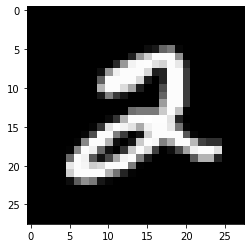

In [9]:
import matplotlib.pyplot as plt

plt.imshow(train[5][0].reshape(28,28), cmap="gray")

In [13]:
train[0][0].shape

torch.Size([1, 28, 28])

In [29]:
plt.imshow(testset[5][0].reshape(28,28), cmap="gray")

TypeError: 'DataLoader' object does not support indexing

In [39]:
len(trainset)

6000

In [40]:
batch = next(iter(trainset))

In [41]:
len(batch)

2

In [42]:
type(batch)

list

In [45]:
images, labels = batch

In [46]:
images.shape

torch.Size([10, 1, 28, 28])

In [47]:
labels.shape

torch.Size([10])

In [48]:
grid = torchvision.utils.make_grid(images, nrow=10)

In [49]:
import numpy as np

Labels:  tensor([1, 1, 8, 2, 9, 0, 7, 8, 3, 7])


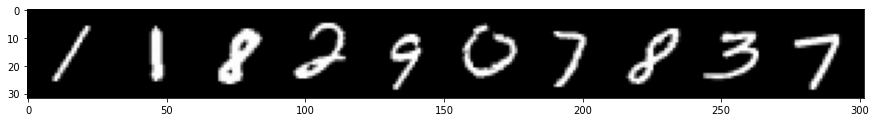

In [50]:
plt.figure(figsize=(15,15))
plt.imshow(np.transpose(grid, (1,2,0)))

print('Labels: ', labels)

In [107]:
correct = 0
total = 0

# incorr = []
incorr_X = []
incorr_y = []
otpt = []
torch_argmax_i = []
y_indx = []
i_trch_argmx = []
idx_y = []

# y_indx[4] torch_argmax_i[4] 

corr_y_indx = []
corr_torch_argmax_i = []

with torch.no_grad():
    for data in testset:
        X, y = data
        output = net(X.view(-1,784))
        
        for idx, i in enumerate(output):
               if torch.argmax(i) == y[idx]:
                correct += 1
                corr_y_indx.append(y[idx])
                corr_torch_argmax_i.append(torch.argmax(i))

               else:
#                 incorr.append([X, y, output, torch.argmax(i), y[idx]])
                     incorr_X.append(X) 
                     incorr_y.append(y)
                     otpt.append(output)
                     torch_argmax_i.append(torch.argmax(i))
                     y_indx.append(y[idx])
                     i_trch_argmx.append(i)
                     idx_y.append(idx)
               total += 1

print("Accuracy: ", round(correct/total, 2))

Accuracy:  0.96


In [81]:
incorr_X[0]

tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0.

In [83]:
incorr_y[0]

tensor([7, 0, 2, 9, 1, 7, 3, 2, 9, 7])

In [84]:
otpt[0]

tensor([[-5.9946e+01, -3.2672e+01, -2.0825e+01, -3.2506e+01, -3.9184e+01,
         -4.5825e+01, -3.4421e+02,  0.0000e+00, -4.9946e+01, -3.2023e+01],
        [ 0.0000e+00, -8.8255e+01, -2.3995e+01, -3.3649e+01, -3.7264e+01,
         -2.5920e+01, -1.9403e+01, -1.6947e+01, -3.1592e+01, -2.6211e+01],
        [-4.0767e+01, -6.9454e+00, -9.6346e-04, -1.8247e+01, -3.2250e+01,
         -2.7169e+01, -2.4363e+01, -1.7925e+01, -2.7795e+01, -6.0200e+01],
        [-5.6963e+00, -4.1945e+00, -2.8804e+00, -7.8483e+00, -1.6360e+00,
         -6.2874e+00, -3.1920e+01, -4.6464e-01, -5.1610e+00, -2.3608e+00],
        [-3.1858e+01, -1.1229e-04, -1.9366e+01, -2.1851e+01, -1.3906e+01,
         -2.1783e+01, -1.1620e+01, -9.6823e+00, -1.0127e+01, -1.5642e+01],
        [-6.1090e+01, -3.0495e+01, -2.7640e+01, -3.1896e+01, -5.1126e+01,
         -4.4888e+01, -3.0215e+02,  0.0000e+00, -4.6570e+01, -3.2146e+01],
        [-6.4231e+01, -1.8283e+01, -2.2085e+01,  0.0000e+00, -8.6616e+01,
         -1.9214e+01, -6.9919e+0

In [85]:
torch_argmax_i[0] 

tensor(7)

In [86]:
y_indx[0]

tensor(9)

In [87]:
i_trch_argmx[0]

tensor([ -5.6963,  -4.1945,  -2.8804,  -7.8483,  -1.6360,  -6.2874, -31.9203,
         -0.4646,  -5.1610,  -2.3608])

In [88]:
idx_y[0]

3

In [103]:
torch_argmax_i[4] 

tensor(4)

In [104]:
y_indx[4] 

tensor(7)

In [108]:
for i in range(10):
    print(corr_torch_argmax_i[i])
    print(corr_y_indx[i])
    print()

tensor(7)
tensor(7)

tensor(2)
tensor(2)

tensor(1)
tensor(1)

tensor(0)
tensor(0)

tensor(4)
tensor(4)

tensor(1)
tensor(1)

tensor(4)
tensor(4)

tensor(9)
tensor(9)

tensor(5)
tensor(5)

tensor(9)
tensor(9)

